# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第3回　2023年12月19日(火)<br>データマイニング手法1-2：マーケットバスケット分析（データ解析と可視化）<br>
Method 1-2: Market basket analysis (Analyze data &amp;visualization)<br>
</font>

<span style="color: red;font-weight:bold; font-size:15pt;" >締め切り 2023年12月22日(金) 23:59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [1]:
# print 関数を使って下さい / Use print function.
print('一瀬遥希')
print('1TE22028G')

一瀬遥希
1TE22028G


## (1) マーケットバスケット分析 / Market Basket Analysis
マーケットバスケット分析で使われる3つの指標をあげてください。<br>
また、その指標を用いて、どのように「よく売れる組み合わせ」を判断するか、簡潔に説明してください。<br>
<br>
Please list up the three indicators in Market Basket Analysis.<br>
Then, Please explain briefly how to find a combination of items that can be expected to be sold more using the three indicators.<br>


(1) 支持度


(2) 確信度


(3) リフト値


(How to judge)
マーケットバスケット分析において、支持度は全事象のうち特定のアイテムが売れる確率、確信度はアイテムAが売れたときにアイテムBが売れる確率、リフト値はアイテムBを購入した人に対するAとBを両方買った人の割合をそれぞれ示している。

分析を行う上で、支持度が高いとその商品の需要が高い、確信度が高いとAとBの結び付きが強いということが分かる。しかしこれだけでは、片方の需要が高いだけで確信度が高い値を示すこともあり、AとBがよく売れる組み合わせであるとは言い切れない。そこでリフト値を用いてAとBが併売されているということを確かめることで、よく売れる組み合わせであると特定できる。またここでは、よく売れる組み合わせと言える基準はリフト値が1を超えていることとされることが多い。



## (2) 必要なライブラリをインポートしてください。 / Import libraries.

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

## Pandas の基礎 / Basics of Pandas

## (3) CSV ファイル(data/w3_score.csv)をDataFrame`score`として読み込んで下さい。
## Please load a CSV file, data/w3_score.csv, as a DataFrame, `score`.

ファイルを読み込んだ後、最初の5行を表示してください。<br>
After loading a CSV file, please display the first 5 lines of the DataFrame, 'score'.<br>

Area size: 1: 大都市/Big city、2：中核市/middle-sized city、3：その他の市/other city、4：町村/towns and villages<br>
ID: 個人番号/identification number<br>
Sex: 性別(1：男子/Male、2：女子/Female、0：不明/Unknown)<br>
Japanese: 国語の得点<br>
Math: 数学の得点<br>
Science: 理科の得点<br>
[元データはこちら:パブリックユースデータ(生徒データ)](https://www.mext.go.jp/a_menu/shotou/gakuryoku-chousa/sonota/1404609.htm)

In [3]:
score = pd.read_csv('data/w3_score.csv')
score.head()

,Area size,ID,Sex,Japanese,Math,Science
0,3,1,2,82,92,64
1,1,2,2,79,56,28
2,1,3,2,82,81,76
3,2,4,1,67,39,68
4,1,5,2,82,86,64


In [4]:
type(score)

pandas.core.frame.DataFrame

## (4) 行名が "Math" の列を抽出して、MathというSeriesを作ってください。 
Extract a column, Math, and a create a Series named Math.<br>

[Week 2: extract](Ex_Week2.ipynb#extract)

In [5]:
Math = score['Math']

In [6]:
print(Math)

0       92
1       56
2       81
3       39
4       86
        ..
1995    69
1996    86
1997    50
1998    75
1999    81
Name: Math, Length: 2000, dtype: int64


## (5) 各地域サイズごとの国語、数学、理科の平均点を出して、散布図にプロットしてください。
横軸にエリアサイズ、縦軸に各科目の平均点を取ってください。<br>
できる人は、標準偏差でエラーバーを付けてみましょう。<br>

Please calculate the averages of Japanese, Math, and Science for each area size.<br>
Plot scattering graphs of area size vs. averages of each subjects.<br>
Add error bars with the standard deviations, if you like.<br>

In [7]:
score_area = score.groupby('Area size')
score_area1 = score_area.get_group(1)
score_area2 = score_area.get_group(2)
score_area3 = score_area.get_group(3)
score_area4 = score_area.get_group(4)

# Average score
# Japanese
area1_Japanese_mean = score_area1['Japanese'].mean()
area2_Japanese_mean = score_area2['Japanese'].mean()
area3_Japanese_mean = score_area3['Japanese'].mean()
area4_Japanese_mean = score_area4['Japanese'].mean()

# Math
area1_Math_mean = score_area1['Math'].mean()
area2_Math_mean = score_area2['Math'].mean()
area3_Math_mean = score_area3['Math'].mean()
area4_Math_mean = score_area4['Math'].mean()

# Science
area1_Science_mean = score_area1['Science'].mean()
area2_Science_mean = score_area2['Science'].mean()
area3_Science_mean = score_area3['Science'].mean()
area4_Science_mean = score_area4['Science'].mean()

   Area size   Japanese       Math    Science
0          1  75.006250  63.402083  52.308333
1          2  75.496667  63.420000  52.480000
2          3  75.408824  63.934314  53.803922
3          4  75.250000  64.200000  53.580000


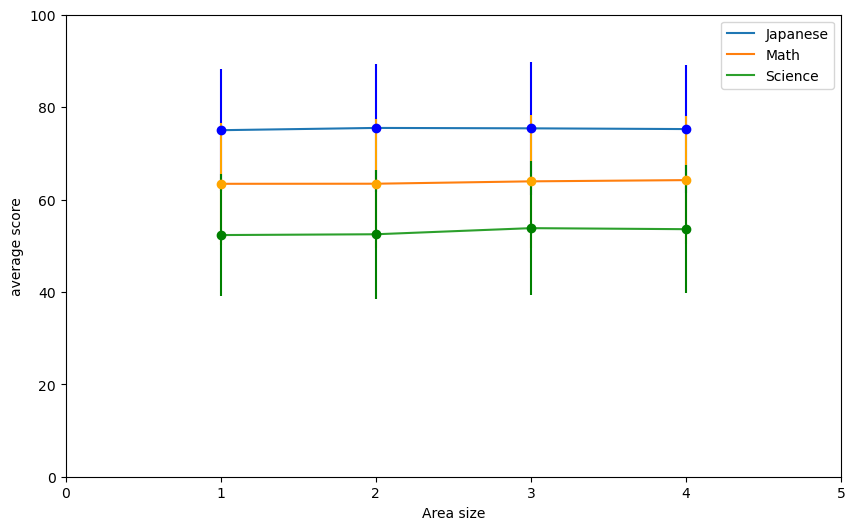

In [8]:
# Scattering plot
average_scores = pd.DataFrame({
    'Area size': [1, 2, 3, 4],
    'Japanese': [area1_Japanese_mean, area2_Japanese_mean, area3_Japanese_mean, area4_Japanese_mean] ,
    'Math': [area1_Math_mean, area2_Math_mean, area3_Math_mean, area4_Math_mean] ,
    'Science': [area1_Science_mean, area2_Science_mean, area3_Science_mean, area4_Science_mean] 
})

error = pd.DataFrame({
    'Area size': [1, 2, 3, 4],
    'Japanese': [score_area1['Japanese'].std(), score_area2['Japanese'].std(), score_area3['Japanese'].std(), score_area4['Japanese'].std()] ,
    'Math':[score_area1['Math'].std(), score_area2['Math'].std(), score_area3['Math'].std(), score_area4['Math'].std()],
    'Science':[score_area1['Science'].std(), score_area2['Science'].std(), score_area3['Science'].std(), score_area4['Science'].std()]
})

# 結果の表示
print(average_scores)
plt.figure(figsize=(10, 6))

# 散布図
sns.lineplot(x='Area size', y='Japanese', data=average_scores, label='Japanese')
plt.errorbar(x=average_scores['Area size'], y=average_scores['Japanese'], yerr=error['Japanese'], fmt='o', color='blue')

sns.lineplot(x='Area size', y='Math', data=average_scores, label='Math')
plt.errorbar(x=average_scores['Area size'], y=average_scores['Math'], yerr=error['Japanese'], fmt='o', color='orange')

sns.lineplot(x='Area size', y='Science', data=average_scores, label='Science')
plt.errorbar(x=average_scores['Area size'], y=average_scores['Science'], yerr=error['Japanese'], fmt='o', color='green')

plt.ylim(0, 100)
plt.xlim(0, 5)

plt.xlabel('Area size')
plt.ylabel('average score')

plt.legend()
plt.show()

## (6) 移住したい都道府県ランキング
移住したい都道府県ランキングについて、2015~2020年のデータ(w3_Prefectures.csv)を見ていきます。<br>
Let's a take a look into the data of ranking of prefectures we want to move to from 2015 to 2020.
The file name is 'w3_Prefectures.csv'.

[Week 2: csvファイルの読み込み](Ex_Week2.ipynb#readcsv)

In [9]:
# load sample data
pre = pd.read_csv('data/w3_Prefectures.csv')

# 最初の5行を表示して、どんなデータか見てましょう。/ Let's take a look at the first 5 lines of this data.
# Use head function.
pre.head()

,2015,2016,2017,2018,2019,2020
0,Nagano,Yamanashi,Nagano,Nagano,Nagano,Shizuoka
1,Yamanashi,Nagano,Yamanashi,Shizuoka,Hiroshima,Yamanashi
2,Shimane,Shizuoka,Shizuoka,Hokkaido,Shizuoka,Nagano
3,Shizuoka,Hiroshima,Hiroshima,Yamanashi,Hokkaido,Fukuoka
4,Okayama,Fukuoka,Niigata,Niigata,Yamanashi,Miyagi


## (7) 集合の積を求める / Find an intersection of two sets.
2015~2020年の間に、ランキングトップ10に毎年必ずランクインしている都道府県名を答えてください。<br>
Please answer the name of the prefecture that is most frequently ranked in the top 10 and the number of times it has been ranked between 2015 and 2020.

[Week 2: 集合の演算](Ex_Week2.ipynb#setope)


In [10]:
df = DataFrame(pre)

set_2015 = set(df['2015'])
set_2016 = set(df['2016'])
set_2017 = set(df['2017'])
set_2018 = set(df['2018'])
set_2019 = set(df['2019'])
set_2020 = set(df['2020'])

print(set_2015 & set_2016 & set_2017 & set_2018 & set_2019 & set_2020)

{'Shizuoka', 'Yamanashi', 'Nagano', 'Hiroshima'}


## マーケットバスケット分析をしてみよう
<img src="img/w3_marketbasket.png" width="500px"><br>

授業でやった手順を、一つずつ追っていきましょう。<br>
Please follow the procedures you did in the exercise of this week.<br>

## (8) データファイル（w3_retail.xlsx）を読み込んでください。
ちょっと時間がかかりますから、焦らず待ちましょう。
Load the sample file. It takes a while to load the entire file. Please be patient!!

[エクセルファイルの読み込みで困ったらopenpyxlを使ってみてください。](Ex_Week3.ipynb#load_excel)

In [11]:
trans = pd.read_excel('data/w3_retail.xlsx')

## (9) 国別のデータ数を確認 / Check the number of data of each country.
[Week 3: value_counts](Ex_Week3.ipynb#value_count)

In [12]:
type(trans)

pandas.core.frame.DataFrame

In [13]:
trans['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## (10) データの整理 / Data processing
[Week 3: データの整理 / Data processing](Ex_Week3.ipynb#data_processing)<br>

In [14]:
# InvoiceNoの先頭1文字をcancel_flgとして追加 / Add a variable `cancel_flg` by extracting the first letter of InvoiceNo.
trans['cancel_flg'] = [str(i)[0] for i in trans.InvoiceNo]
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5


## (11) 国ごとにキャンセルされたInvoiceNoの数を調べてください。

Check the number of cancelled InvoiceNo for each country.<br>


In [15]:
# United Kingdom
trans_cancel_UK = trans[(trans['Country'] == 'United Kingdom') & (trans['cancel_flg'] == 'C')]
trans_cancel_UK_No = set(trans_cancel_UK.InvoiceNo)
print('United Kingdom:', len(trans_cancel_UK_No))

# Germany
trans_cancel_Germany = trans[(trans['Country'] == 'Germany') & (trans['cancel_flg'] == 'C')]
trans_cancel_Germany_No = set(trans_cancel_Germany.InvoiceNo)
print('Germany:', len(trans_cancel_Germany_No))

# France
trans_cancel_France = trans[(trans['Country'] == 'France') & (trans['cancel_flg'] == 'C')]
trans_cancel_France_No = set(trans_cancel_France.InvoiceNo)
print('France:', len(trans_cancel_France_No))


# EIRE
trans_cancel_EIRE = trans[(trans['Country'] == 'EIRE') & (trans['cancel_flg'] == 'C')]
trans_cancel_EIRE_No = set(trans_cancel_EIRE.InvoiceNo)
print('EIRE:', len(trans_cancel_EIRE_No))


# Spain
trans_cancel_Spain = trans[(trans['Country'] == 'Spain') & (trans['cancel_flg'] == 'C')]
trans_cancel_Spain_No = set(trans_cancel_Spain.InvoiceNo)
print('Spain:', len(trans_cancel_Spain_No))



United Kingdom: 3372
Germany: 146
France: 69
EIRE: 72
Spain: 15


## (12) 通常のデータである「5」であり、かつ、`CustomerID`が欠損していないデータだけを抽出する。
Extract only the data whose invoice number starts with "5", which is normal data, and that does not have a missing `CustomerID`.

In [16]:
# extract data only when cancel_flg is 5, and CustomerID is not null.
trans_normal = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [17]:
# 有効なデータのサイズをチェックして、もともとデータサイズと比べてみよう。****** に適切な関数を入れてください。
# Check the size of the available data. Compare it with the original data size. Fill in the part ***** with an appropriate function.
# Hint: trans.*****
trans_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   cancel_flg   397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


## (13) ドイツでの売上げ1位の商品と売上げ2位の商品の間の支持度、確信度、リフト値を算出してください。
Calculate the support, confidence, and lift values between the product with the highest sales in Germany and the product with the second highest sales.

[Week 3: support](Ex_Week3.ipynb#support)<br>
[Week 3: confidence](Ex_Week3.ipynb#confidence)<br>
[Week 3: lift](Ex_Week3.ipynb#lift)<br>

<b>注意!! / Attension!!</b><br>
85099B、のように、文字が含まれていると、数字が入っていても文字列として解釈されるので、クオーテーションマークが要りますが、<br>
12345は数字のみで構成されているので、数字として扱われます。<br>
If the StockCode includes characters, it is assumed to be a string. <br>
If not, it is assumed to be a number. In this case, you don't have to use quotation mark. Please see the examples below.<br>
* クオーテーションマークが要る場合 / Need to use quotation mark
trans_a = set(trans[trans['StockCode']=='12345A'].InvoiceNo)
* クオーテーションマークが要らない場合 / No need to use quotation mark
trans_a = set(trans[trans['StockCode']==12345].InvoiceNo)

In [18]:
# ドイツの購入履歴を抽出 / Extract the data of purchases in Germany.
trans_Germany = trans[trans['Country'] == 'Germany']

In [19]:
# ドイツでは何がよく売れたでしょうか??
# ドイツの商品コード(StockCode)ごとに件数を数え、上位5件を表示 / Display the number of appearance of the item number in Germany in a descending order.

trans_Germany['StockCode'].value_counts().head()

StockCode
POST     383
22326    120
22423     81
22328     78
22554     67
Name: count, dtype: int64

In [20]:
#ドイツでのすべてのInvoiceNoをtrans_allとして集合型を定義 / Define a set of all of the `InvoiceNo` as `trans_all` for the data in Germany.
trans_all = set(trans_Germany.InvoiceNo) 
print(len(trans_all))

# 売り上げ1位の商品を購入したバスケット(InvoiceNo)の集合をtrans_aとする
# The basket which contains the product with the highest sales is extracted as trans_a.
trans_a = set(trans_Germany[trans_Germany['StockCode']=='POST'].InvoiceNo)
print(len(trans_a))

# 売り上げ2位の商品を購入したバスケット(InvoiceNo)の集合をtrans_bとする
# The basket which contains the product with the second highest sales is extracted as trans_b.
trans_b = set(trans_Germany[trans_Germany['StockCode'] == 22326].InvoiceNo)
print(len(trans_b))

# support
trans_ab = trans_a.intersection(trans_b)
print('support:{:.3f}'.format(len(trans_ab)/len(trans_all)))

# confidence
print('Confidence("POST"->"22326"):{:.3f}'.format(len(trans_ab)/len(trans_a)))

# lift
support_b = len(trans_b) / len(trans_all)
confidence = len(trans_ab) / len(trans_a)
lift = confidence / support_b
print('lift:{:.3f}'.format(lift))


603
383
119
support:0.171
Confidence("POST"->"22326"):0.269
lift:1.363


## (14) MLXTENDを用いて、スペインでよく売れた商品の組み合わせを見つけてください。


In [21]:
trans_Spain = trans[trans['Country'] == 'Spain']

In [22]:
# ライブラリのインストール
! pip install mlxtend

In [23]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [24]:
basket = (trans_Spain.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head(10)

Description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
538525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540469,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
540550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def sum_to_boolean(x):
  if x<=0:
    return 0
  else:
    return 1
basket_final = basket.applymap(sum_to_boolean)
basket_final.head(10)

Description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
538525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540469,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
540550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
frequent_itemsets = apriori(basket_final, min_support = 0.02,
  use_colnames = True)
# frequent_itemsets.sort_values('support', ascending = False).head()
frequent_itemsets.sort_values('support', ascending = False)

c:\Users\harui\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
166,0.590476,(POSTAGE)
185,0.209524,(REGENCY CAKESTAND 3 TIER)
1021,0.161905,"(POSTAGE, REGENCY CAKESTAND 3 TIER)"
6,0.142857,(6 RIBBONS RUSTIC CHARM)
96,0.133333,(JAM MAKING SET WITH JARS)
...,...,...
3846,0.028571,"(VINTAGE CREAM CAT FOOD CONTAINER, SET/5 RED R..."
3847,0.028571,"(SET/5 RED RETROSPOT LID GLASS BOWLS, VINTAGE ..."
3848,0.028571,"(VINTAGE CREAM CAT FOOD CONTAINER, VINTAGE CRE..."
3849,0.028571,"(JAM MAKING SET PRINTED, JAM MAKING SET WITH J..."


In [27]:
a_rules = association_rules(frequent_itemsets, metric = "lift",  min_threshold = 1)
a_rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
365035,"(6 RIBBONS RUSTIC CHARM, PLASTERS IN TIN WOODL...","(PARTY BUNTING, RED RETROSPOT TAPE, PLASTERS I...",0.028571,0.028571,0.028571,1.000000,35.000000,0.027755,inf,1.000000
383995,"(PARTY BUNTING, VINTAGE CREAM CAT FOOD CONTAIN...","(BREAD BIN DINER STYLE MINT, JUMBO BAG PINK VI...",0.028571,0.028571,0.028571,1.000000,35.000000,0.027755,inf,1.000000
383989,"(SET/5 RED RETROSPOT LID GLASS BOWLS, JUMBO BA...","(BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT...",0.028571,0.028571,0.028571,1.000000,35.000000,0.027755,inf,1.000000
383990,"(FRENCH TOILET SIGN BLUE METAL, PARTY BUNTING,...","(BREAD BIN DINER STYLE MINT, JUMBO BAG PINK VI...",0.028571,0.028571,0.028571,1.000000,35.000000,0.027755,inf,1.000000
383991,"(FRENCH TOILET SIGN BLUE METAL, VINTAGE CREAM ...","(BREAD BIN DINER STYLE MINT, JUMBO BAG PINK VI...",0.028571,0.028571,0.028571,1.000000,35.000000,0.027755,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
1479,(POSTAGE),(SET/10 RED POLKADOT PARTY CANDLES),0.590476,0.047619,0.028571,0.048387,1.016129,0.000454,1.000807,0.038760
1436,(ROSE COTTAGE KEEPSAKE BOX ),(POSTAGE),0.047619,0.590476,0.028571,0.600000,1.016129,0.000454,1.023810,0.016667
1497,(STRAWBERRY LUNCH BOX WITH CUTLERY),(POSTAGE),0.047619,0.590476,0.028571,0.600000,1.016129,0.000454,1.023810,0.016667
251,(BISCUIT TIN 50'S CHRISTMAS),(POSTAGE),0.047619,0.590476,0.028571,0.600000,1.016129,0.000454,1.023810,0.016667
